In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator, StatevectorSimulator, QasmSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Step 1: Create a quantum circuit with 2 qubits (representing the two sublattices in the antiferromagnetic material)
qc = QuantumCircuit(2)


In [3]:

# Step 2: Initialize both qubits in the |0> state (representing the initial antiparallel alignment of magnetic moments)
qc.initialize([1, 0], 0)  # Qubit 0 represents sublattice A
qc.initialize([1, 0], 1)  # Qubit 1 represents sublattice B (aligned opposite to A)


In [4]:

# Step 3: Apply a Hadamard gate to both qubits to simulate superposition (representing the initial response to the external field)
qc.h(0)
qc.h(1)


In [5]:

# Step 4: Apply Pauli-X gates to simulate the flipping of magnetic moments under an external magnetic field
# Qubit 0 (sublattice A) and Qubit 1 (sublattice B) flip their states, simulating a realignment of moments in the field
qc.x(0)
qc.x(1)


In [6]:

# Step 5: Apply a Phase gate to simulate energy losses and lag (representing the hysteresis effect due to exchange interactions)
qc.p(np.pi / 4, 0)
qc.p(np.pi / 4, 1)


In [7]:

# Step 6: Reverse the magnetic field by applying another Pauli-X gate (simulating the reversal of the external magnetic field)
qc.x(0)
qc.x(1)


In [8]:

# Step 7: Apply another Phase gate to simulate coercivity and remanence in the antiferromagnetic hysteresis loop
qc.p(np.pi / 2, 0)
qc.p(np.pi / 2, 1)


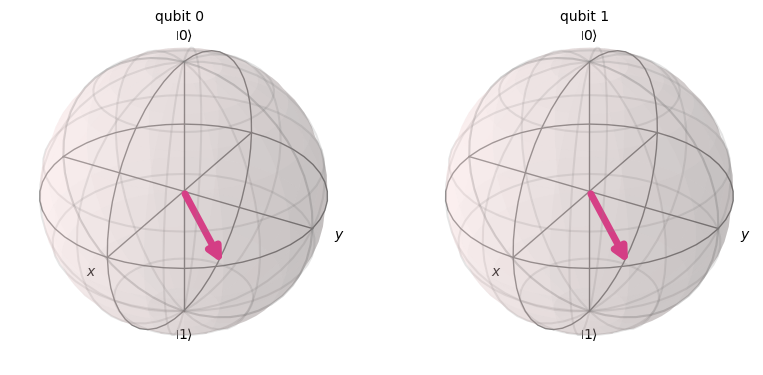

In [9]:

# Step 8: Visualize the qubits' states on the Bloch sphere to observe the hysteresis effect (lag between field and magnetic moment reversal)

final_state = StatevectorSimulator().run(qc).result().get_statevector()


plot_bloch_multivector(final_state)



In [10]:
# Step 9: Measure both qubits to observe the final state of the sublattice magnetization (after the hysteresis loop is complete)
qc.measure_all()


In [11]:

# Step 10: Simulate the measurement and plot the results
result = QasmSimulator().run(qc,shot =1024).result()
counts = result.get_counts(qc)



Measurement results: {'01': 238, '11': 281, '10': 249, '00': 256}


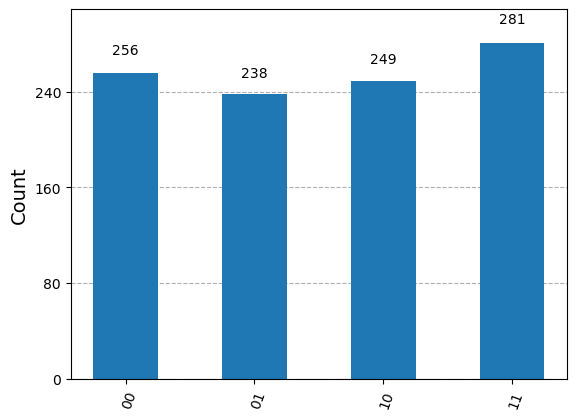

In [12]:
# Print the measurement results and plot the histogram (representing the final state of the sublattices after hysteresis)
print(f"Measurement results: {counts}")
plot_histogram(counts)



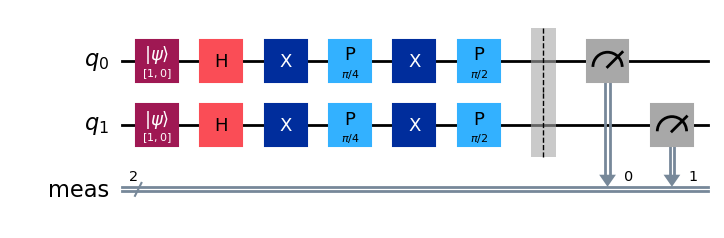

In [13]:
# Draw the quantum circuit
qc.draw(output='mpl')